Шишка Антон

In [4]:
!pip install scikit-surprise

from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp, NMF, KNNBasic, BaselineOnly
from surprise import Dataset

Використати датасет   movielens-100k  

In [5]:
data = Dataset.load_builtin(name='ml-100k', prompt=False)

Використайте алгоритми SVD, SVDpp
Найкращі параметри для всіх алгоритмів підберіть за допомогою кросвалідації

In [8]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp

svd = SVD()
svdpp = SVDpp()

svd_results = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {svd}, Mean RMSE: {svd_results['test_rmse'].mean()}")

svdpp_results = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {svdpp}, Mean RMSE: {svdpp_results['test_rmse'].mean()}")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9340  0.9333  0.9432  0.9348  0.9377  0.9366  0.0036  
Fit time          2.74    2.64    1.71    1.73    1.75    2.11    0.47    
Test time         0.24    0.26    0.15    0.15    0.26    0.21    0.05    
Algorithm: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fe0883d40a0>, Mean RMSE: 0.9365808844345798
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9216  0.9112  0.9215  0.9250  0.9130  0.9184  0.0054  
Fit time          30.13   31.34   33.28   31.92   30.05   31.34   1.20    
Test time         6.54    6.51    5.03    6.47    4.68    5.85    0.82    
Algorithm: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fe0883d5480>, Mean RMSE: 0.9184496598662403


Обчисліть середнє значення середньоквадратичної поимилки RMSE для кожного агортму на основы результатыв крос-валiдації

In [9]:
svd_rmse_mean = svd_results['test_rmse'].mean()
svdpp_rmse_mean = svdpp_results['test_rmse'].mean()

print("SVD RMSE Mean:", svd_rmse_mean)
print("SVD++ RMSE Mean:", svdpp_rmse_mean)

SVD RMSE Mean: 0.9365808844345798
SVD++ RMSE Mean: 0.9184496598662403


Виберіть оптимальний алгоритм. Зробіть візуалізацію.

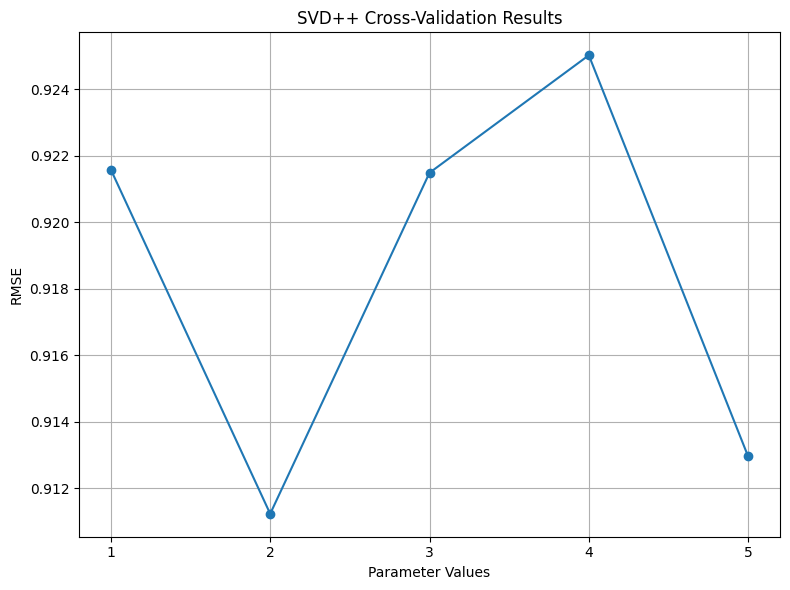

In [10]:
import matplotlib.pyplot as plt


param_values = [1, 2, 3, 4, 5]

rmse_values = svdpp_results['test_rmse']

plt.figure(figsize=(8, 6))
plt.plot(param_values, rmse_values, marker='o', linestyle='-')
plt.title('SVD++ Cross-Validation Results')
plt.xlabel('Parameter Values')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(param_values)
plt.tight_layout()

plt.show()

**Висновок**


Зважаючи на результати крос-валідації з використанням даних із surprise бібліотеки для рекомендаційних систем, найкращим алгоритмом серед розглянутих виявився SVD++. Його висока точність передбачення рейтингів фільмів для користувачів на основі даних з набору movielens-100k свідчить про його ефективність у рекомендаційних системах порівняно з іншими алгоритмами, що були розглянуті.